**Task 4.3 Supervised Learning - Regression and hyperparameter tuning**

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
df = pd.read_csv('BloodBrain.csv') 
print(df.columns)
print(df.head())

Index(['tpsa', 'nbasic', 'negative', 'vsa_hyd', 'a_aro', 'weight',
       'peoe_vsa.0', 'peoe_vsa.1', 'peoe_vsa.2', 'peoe_vsa.3',
       ...
       'ctdh', 'ctaa', 'mchg', 'achg', 'rdta', 'n_sp2', 'n_sp3', 'o_sp2',
       'o_sp3', 'logBBB'],
      dtype='object', length=135)
        tpsa  nbasic  negative    vsa_hyd  a_aro   weight  peoe_vsa.0  \
0  12.030000       1         0  167.06700      0  156.293    76.94749   
1  49.330002       0         0   92.64243      6  151.165    38.24339   
2  50.529999       1         0  295.16700     15  366.485    58.05473   
3  37.389999       0         0  319.11220     15  382.552    62.23933   
4  37.389999       1         0  299.65800     12  326.464    74.80064   

   peoe_vsa.1  peoe_vsa.2  peoe_vsa.3  ...  ctdh  ctaa    mchg    achg  \
0    43.44619     0.00000    0.000000  ...     1     1  0.9241  0.9241   
1    25.52006     0.00000    8.619013  ...     2     2  1.2685  1.0420   
2   124.74020    21.65084    8.619013  ...     1     4  1.2562 

**Zielvariable**

In [9]:
X = df.drop(columns=['logBBB'])
y = df['logBBB']

**Split für Training und Testdaten**

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

**# 5. Modell & Hyperparameter-Tuning mit GridSearchCV**

In [12]:
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10,
                           scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)


Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

**Bestes Modell**

In [13]:
best_rf = grid_search.best_estimator_
print("Beste Hyperparameter:", grid_search.best_params_)

Beste Hyperparameter: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}


**Cross-Validation Score (R²)**

In [14]:
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=10, scoring='r2')
print("R² Scores (10-fold CV):", cv_scores)
print("Durchschnittlicher R²:", cv_scores.mean())

R² Scores (10-fold CV): [0.58501311 0.28188787 0.68870892 0.63196643 0.57190502 0.71170829
 0.6495217  0.60087721 0.58613383 0.49409561]
Durchschnittlicher R²: 0.5801817989910768


**Vorhersage der Testdaten**

In [15]:
y_pred = best_rf.predict(X_test)
print("Test Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Test R² Score:", r2_score(y_test, y_pred))

Test Mean Squared Error: 0.25545922701923085
Test R² Score: 0.3889344030050379


•	Test Mean Squared Error (MSE): 0.255

•	Das ist der durchschnittliche quadratische Fehler der Vorhersagen

•	Ein kleinerer Wert ist besser → liegt im Schnitt etwa bei √0.255 ≈ 0.50 logBBB-Einheiten daneben

•	Test R² Score: 0.389

•	Das Modell erklärt ca. 38.9 % der Varianz in logBBB auf den Testdaten

•	besser als Zufall, aber es gibt definitiv noch Verbesserungspotenzial

**Feature importans**

Top 10 wichtigste Merkmale:
fnsa3                   0.042949
tpsa                    0.037888
prx                     0.035355
tcnp                    0.029565
most_positive_charge    0.028157
polar_area              0.027071
rpcg                    0.026401
tpsa.1                  0.021384
psa_npsa                0.021016
logp.o.w.               0.019975
dtype: float64


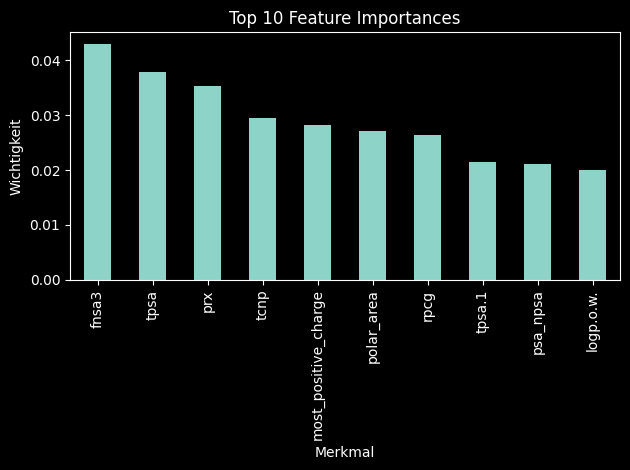

In [ ]:
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)
print("Top 10 wichtigste Merkmale:")
print(importances_sorted.head(10))

importances_sorted.head(10).plot(kind='bar')
plt.title('Top 10 Feature Importances')
plt.ylabel('Wichtigkeit')
plt.xlabel('Merkmal')
plt.tight_layout()
plt.show()